In [1]:
import pandas as pd
import warnings

warnings.simplefilter(action='ignore')

from hypex.dataset import Dataset, ExperimentData, InfoRole, TreatmentRole, TargetRole, StratificationRole
from hypex.analyzers.aa import AAScoreAnalyzer
from hypex.experiments.aa import AATest
from hypex.reporters.aa2 import AAPassedReporter, AABestSplitReporter

In [2]:
data = Dataset(
    roles={
        "user_id": InfoRole(int),
        "treat": TreatmentRole(int),
        "pre_spends": TargetRole(),
        "post_spends": TargetRole(),
        "gender": StratificationRole(str)
    }, data="data.csv",
)
# data

In [3]:
aa = AATest(n_iterations=10)
res = aa.execute(data)

In [4]:
res.resume

  TTest aa test KSTest aa test TTest best split KSTest best split  result  \
0        NOT OK         NOT OK               OK                OK  NOT OK   
1        NOT OK         NOT OK               OK                OK  NOT OK   

       feature group  
0  post_spends     0  
1   pre_spends     0  

In [5]:
res.aa_score

                       pass     score
pre_spends┴TTest┴0    False  0.862724
post_spends┴TTest┴0   False  0.890264
pre_spends┴KSTest┴0   False  0.829781
post_spends┴KSTest┴0  False  0.838848

In [6]:
res.best_split

      user_id  signup_month  treat  pre_spends  post_spends   age gender  \
0           0             0      0       488.0   414.444444   NaN      M   
1           1             8      1       512.5   462.222222  26.0    NaN   
2           2             7      1       483.0   479.444444  25.0      M   
3           3             0      0       501.5   424.333333  39.0      M   
4           4             1      1       543.0   514.555556  18.0      F   
...       ...           ...    ...         ...          ...   ...    ...   
9995     9995            10      1       538.5   450.444444  42.0      M   
9996     9996             0      0       500.5   430.888889  26.0      F   
9997     9997             3      1       473.0   534.111111  22.0      F   
9998     9998             2      1       495.0   523.222222  67.0      F   
9999     9999             7      1       508.0   475.888889  38.0      F   

        industry    split  
0     E-commerce  control  
1     E-commerce  control  
2  

In [7]:
res.best_split_statistic

       feature group TTest pass  TTest p-value KSTest pass  KSTest p-value
0   pre_spends     0         OK       0.187276          OK        0.220219
1  post_spends     0         OK       0.159736          OK        0.211152

In [10]:
res.experiments

                          splitter_id  \
0  AASplitterWithStratification┴rs 0┴   
1  AASplitterWithStratification┴rs 1┴   
2  AASplitterWithStratification┴rs 2┴   
3  AASplitterWithStratification┴rs 3┴   
4  AASplitterWithStratification┴rs 4┴   
5  AASplitterWithStratification┴rs 5┴   
6  AASplitterWithStratification┴rs 6┴   
7  AASplitterWithStratification┴rs 7┴   
8  AASplitterWithStratification┴rs 8┴   
9  AASplitterWithStratification┴rs 9┴   

   pre_spends┴GroupDifference┴control mean┴0  \
0                                 487.288778   
1                                 487.288778   
2                                 487.288778   
3                                 487.288778   
4                                 487.288778   
5                                 487.288778   
6                                 487.288778   
7                                 487.288778   
8                                 487.288778   
9                                 487.288778   

   pre_spends┴Group

In [9]:
res = AAScoreAnalyzer().execute(res)

AttributeError: 'AAOutput' object has no attribute 'get_one_id'

In [ ]:
AAPassedReporter().report(res).data

,TTest aa test,KSTest aa test,TTest best split,KSTest best split,result,feature,group
0,OK,NOT OK,OK,OK,OK,post_spends,0
1,NOT OK,NOT OK,OK,OK,NOT OK,pre_spends,0


In [ ]:
best_split_data = AABestSplitReporter().report(res).data
best_split_data

,user_id,signup_month,treat,pre_spends,post_spends,age,gender,industry,split
0,0,0,0,488.0,414.444444,NaN,M,E-commerce,control
2,2,7,1,483.0,479.444444,25.0,M,Logistics,control
3,3,0,0,501.5,424.333333,39.0,M,E-commerce,control
4,4,1,1,543.0,514.555556,18.0,F,E-commerce,control
5,5,6,1,486.5,486.555556,44.0,M,E-commerce,control
...,...,...,...,...,...,...,...,...,...
9995,9995,10,1,538.5,450.444444,42.0,M,Logistics,test
9996,9996,0,0,500.5,430.888889,26.0,F,Logistics,test
9997,9997,3,1,473.0,534.111111,22.0,F,E-commerce,test
9998,9998,2,1,495.0,523.222222,67.0,F,E-commerce,test


split
control    Axes(0.125,0.11;0.775x0.77)
test       Axes(0.125,0.11;0.775x0.77)
Name: gender, dtype: object

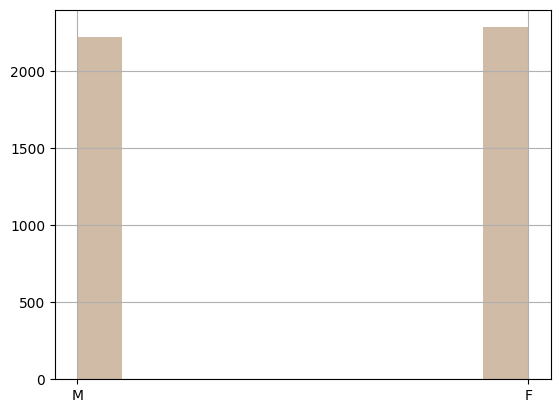

In [ ]:
best_split_data.groupby("split")["gender"].hist(alpha=0.3)

In [ ]:
res.analysis_tables

{'AATest┴┴':                           splitter_id  \
 0  AASplitterWithStratification┴rs 0┴   
 1  AASplitterWithStratification┴rs 1┴   
 2  AASplitterWithStratification┴rs 2┴   
 3  AASplitterWithStratification┴rs 3┴   
 4  AASplitterWithStratification┴rs 4┴   
 5  AASplitterWithStratification┴rs 5┴   
 6  AASplitterWithStratification┴rs 6┴   
 7  AASplitterWithStratification┴rs 7┴   
 8  AASplitterWithStratification┴rs 8┴   
 9  AASplitterWithStratification┴rs 9┴   
 
    pre_spends┴GroupDifference┴control mean┴0  \
 0                                 487.288778   
 1                                 487.288778   
 2                                 487.288778   
 3                                 487.288778   
 4                                 487.288778   
 5                                 487.288778   
 6                                 487.288778   
 7                                 487.288778   
 8                                 487.288778   
 9                                